# The Youtube Trending page and its correlation with Watchability, Tags, and Audience Population
<br>
<p>
    Youtube is a media platform that allows for both multimillion dollar media companies as well as the average Joe to create content for all of the world to see. With the ability for almost every intrest, country, and person to upload, this allows for some interesting information to be spread. However, some information is more popular than others.
</p>
<p>
    This is the reason for the youtube trending page. This allows for everyone to see what videos and ideas are most popular on the site. The trending page can have evrything to video blogging (vlogging), comedy, music, and much more. However, the trending is not not just for the entire world. Youtube also has trending pages for many countries such as the US, Canada, Mexico and many more. And this is where the interest comes into play. What does it take to be a trending video on Youtube?
</p>
<p>
    Youtube Trending page is more than just a popular video. This page can lead to some finacial rewards and fame. With this in mind our aim is to find out what it takes to make trending. For this process we will look at the following:
    <ul>
        <li>Correlation of Likes, Dislikes, and Comment Count as it relates to catagorys and countries</li>
        <li>Correlation of Tags to Countries and the most popular for each country</li>
        <li>Correlation of average views per trending video and country size</li>
     </ul>
<p>
    We will also be looking at the following countries:
    <ul>
        <li>Brazil(BR)</li>
        <li>Canada(CA)</li>
        <li>Denmark(DE)</li>
        <li>France(FR)</li>
        <li>Great Britian(GB)</li>
        <li>India(IN)</li>
        <li>Japan(JP)</li>
        <li>South Korea(KR)</li>
        <li>Mexico(MX)</li>
        <li>Russia(RU)</li>
        <li>United States of America(US)</li>
    

In [1]:
import numpy as np
import pandas as pd
import requests
import os, glob
import psutil
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import more_itertools
from google_trans_new import google_translator

website = 'https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=US_category_id.json'

<h1>Functions and constants that we work with</h1>

In [2]:
#youtube catagory conversion
cat = {2:"Autos & Vehicles",
1:"Film & Animation",
10:"Music",
15:"Pets & Animals",
17:"Sports",
18:"Short Movies",
19:"Travel & Events",
20:"Gaming",
21:"Videoblogging",
22:"People & Blogs",
23:"Comedy",
24:"Entertainment",
25:"News & Politics",
26:"Howto & Style",
27:"Education",
28:"Science & Technology",
29:"Nonprofits & Activism",
30:"Movies",
31:"Anime/Animation",
32:"Action/Adventure",
33:"Classics",
34:"Comedy",
35:"Documentary",
36:"Drama",
37:"Family",
38:"Foreign",
39:"Horror",
40:"Sci-Fi/Fantasy",
41:"Thriller",
42:"Shorts",
43:"Shows",
44:"Trailers"}

population = {
    'CA':37799407,
    'BR':212821986,
    'DE':5792202,
    'FR':65273511,
    'GB':67886011,
    'IN':1380004385,
    'JP':126476461,
    'KR':51276977,
    'MX':129166028,
    'RU':145945524,
    'US':331341050
}

colors = {
    'BR':'green',
    'CA':'fuchsia',
    'DE':'blue',
    'FR':'purple',
    'GB':'brown',
    'IN':'orange',
    'KR':'black',
    'MX':'darkgreen',
    'RU':'yellow',
    'US':'red'}

In [15]:
def current_dir():
    return(os.getcwd())

def reader(file):
    data = pd.read_csv(file)
    data['country']=[file[:2] for f in data['title']]
    data['catagory']=[cat[c] if c in cat else'Na' for c in data['categoryId']]
    data['color']=[colors[c] if c in cat else'White' for c in data['country']]
    return(data)

def combine():
    os.chdir(current_dir())

    li = []
    sizes = 0
    for file in glob.glob("*.csv", recursive = True):
        li.append(reader(file))
        print(file,'-----',len(reader(file).index))
        sizes += len(reader(file).index)
    print("total size for top 30 videos in 11 countries is "+str(sizes))
    result = pd.concat(li, axis=0, ignore_index=True)
    return(result)

def by_country(df):
    return(result.groupby(['country']).mean())

def by_catagory(df):
    return(result.groupby(['catagory']).mean())

def by_country_catagory(df):
    return(result.groupby(['country','catagory']).mean())

def country_tags_dic_sort(given_country):
    country_tags_sublist = result.loc[result['country'] == given_country, 'tags'].tolist()
    for i in range(len(country_tags_sublist)):
        country_tags_sublist[i] = country_tags_sublist[i].split('|')
    country_tags_list = list(itertools.chain.from_iterable(country_tags_sublist))
    country_tags_dic = {}
    for j in country_tags_list:
        country_tags_dic[j] = country_tags_dic.get(j, 0) + 1
    country_tags_dic_sorted = dict(sorted(country_tags_dic.items(), key = lambda kv:(kv[1], kv[0]), reverse = True))
    del country_tags_dic_sorted['[None]']
    return country_tags_dic_sorted

def top_10_country_tags(country):
    return more_itertools.take(10, country_tags_dic_sort(country).items())

def display_top_country_tags():
    country_list = result['country'].unique()
#    translator = Translator(service_urls=['translate.googleapis.com'], to_lang='en')
    for i in country_list:
        list1 = top_10_country_tags(i)
        word, frequency = zip(*list1)
        word = list(word)
#        for j in range(len(word)):
#            word[j] = translator.translate(word[j])
        indices = np.arange(len(list1))
#        plt.rcParams["font.serif"] = "UTF-8"
        plt.bar(indices, frequency, color = 'r')
        plt.xticks(indices, word, rotation ='vertical')
        plt.title("Frequency of Top 10 Tags-%s"%i)
        plt.tight_layout()
        plt.show()
        print(word)
        
def display_country_tagpercentage():
    country_list=result['country'].unique()
    for i in country_list:
        list1 = top_10_country_tags(i)
#        list1 = list1[0:5]
        labels, size = zip(*list1)
        fig1, ax1 = plt.subplots() 
        ax1.pie(size, labels=labels, autopct='%1.1f%%', shadow=True)
        ax1.set(aspect = 'equal', title = "Top Tags - %s"%i)
        plt.show()
        
def population_plot():
    Views_by_country=result.groupby(['country']).mean()
    co =  Views_by_country.index.to_list()
    view = Views_by_country['view_count'].to_list()
    d= {}
    for i,c in enumerate(co):
        if c in population.keys():
            d[c]=(view[i]/population[c])*100
    plt.bar(d.keys(), d.values(), color='g')
    plt.title('Population to Views')
    plt.xlabel('Country')
    plt.ylabel('% population watching')
    plt.show()
    

<h2>Getting all CSV files for the Data</h2>
<p>
    first thing that we will do is combine all CSV files for each country and find out both how big the dataset is and what it looks like all put together

In [4]:
result = combine()

BR_youtube_trending_data.csv ----- 40393
CA_youtube_trending_data.csv ----- 40345
DE_youtube_trending_data.csv ----- 40347
FR_youtube_trending_data.csv ----- 40394
GB_youtube_trending_data.csv ----- 40395
IN_youtube_trending_data.csv ----- 37792
JP_youtube_trending_data.csv ----- 40396
KR_youtube_trending_data.csv ----- 37354
MX_youtube_trending_data.csv ----- 40199
RU_youtube_trending_data.csv ----- 40257
US_youtube_trending_data.csv ----- 40392
total size for top 30 videos in 11 countries is 438264


<h2>Likes, Dislikes, Comments, and Much More</h2>

Looking at the loaded data, we can see that for the top trending videos across 11 countries we 438264 data points available to us. Let's look into the data now.
<p>
    First, lets see if we can find anly correlation from the following columns that contain numerical data
    </p>
    

In [5]:
new_columns=['categoryId','view_count','likes','dislikes','comment_count']
analyze=result[new_columns]
analyze

,categoryId,view_count,likes,dislikes,comment_count
0,22,263835,85095,487,4500
1,10,6000070,714310,15176,31040
2,22,2296748,39761,5484,0
3,20,300510,46222,242,2748
4,23,327235,22059,3972,2751
...,...,...,...,...,...
438259,20,453545,15481,379,2289
438260,20,2349296,62948,11658,20066
438261,24,2236533,189768,922,14878
438262,22,841876,54405,573,9090


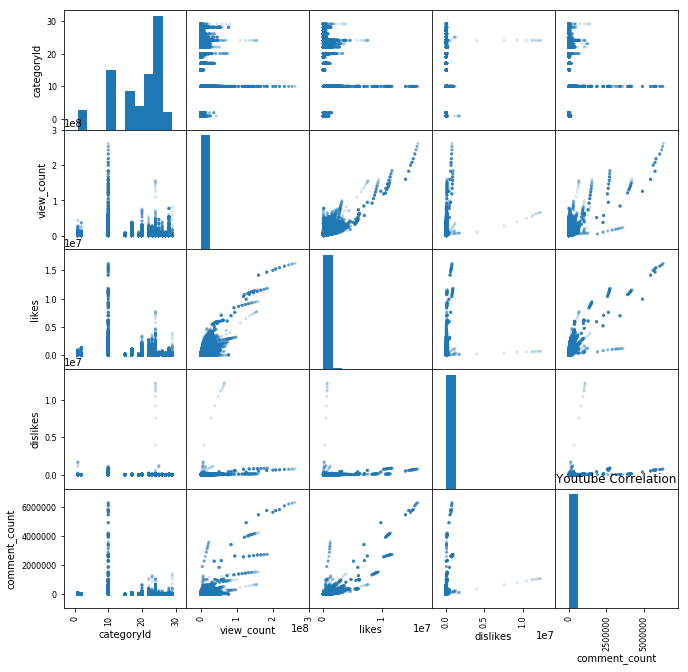

In [6]:
pd.plotting.scatter_matrix(analyze,alpha = 0.2,range_padding=0.3,figsize = (11,11))
plt.suptitle('Youtube Correlation')
plt.show()

From here, we can see that Views, Likes, Dislikes, and Comment Count all seem to have a correlation in trending videos. CatagoryID dosen't nessecarly have a correlation as it goes across all platforms.However, there may be some interesting things behind the scences. If you will notice, catagory 10 seems to have the most Likes, Comments, and Comment count and one of the lowest dislikes. Where catagory 25 seems to have the most dislikes compared to the others. When we look at the catagory IDs 10 is Music and 25 in Politics and news. 
<p>
    Now, we can break down our data even more, by looking by country, by catagory, and by both. When we look at country we see the following:

In [7]:
by_country(result)

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
country,,,,,,,
BR,18.378432,1.519071e+06,118591.747778,2168.888372,10288.868319,0.014730,0.005323
CA,19.231057,2.439097e+06,143712.499938,3255.500161,15105.609840,0.017276,0.007312
DE,18.644286,1.338032e+06,85601.582869,2291.850472,9888.550524,0.015838,0.007981
FR,18.502797,1.071915e+06,80875.259915,1609.042184,7864.472100,0.009927,0.010645
GB,19.136527,1.894635e+06,113139.976705,2524.318802,11887.795841,0.026587,0.006783
IN,20.672867,2.644639e+06,133153.575016,8829.967903,15313.253202,0.010399,0.008811
JP,19.425636,1.091188e+06,55249.769730,1419.481607,7350.674077,0.059610,0.063249
KR,20.163543,1.439032e+06,75962.589361,1618.252690,10415.990362,0.007041,0.017535
MX,18.266773,2.032517e+06,150530.550685,3151.742730,14046.568497,0.007388,0.003134


In [8]:
Views_by_country=result.groupby(['country']).mean()
Views_by_country.nlargest(11,['view_count'])

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
country,,,,,,,
US,18.496980,2.698639e+06,151317.711106,3559.914934,16120.669019,0.018642,0.006907
IN,20.672867,2.644639e+06,133153.575016,8829.967903,15313.253202,0.010399,0.008811
CA,19.231057,2.439097e+06,143712.499938,3255.500161,15105.609840,0.017276,0.007312
MX,18.266773,2.032517e+06,150530.550685,3151.742730,14046.568497,0.007388,0.003134
GB,19.136527,1.894635e+06,113139.976705,2524.318802,11887.795841,0.026587,0.006783
BR,18.378432,1.519071e+06,118591.747778,2168.888372,10288.868319,0.014730,0.005323
KR,20.163543,1.439032e+06,75962.589361,1618.252690,10415.990362,0.007041,0.017535
DE,18.644286,1.338032e+06,85601.582869,2291.850472,9888.550524,0.015838,0.007981
JP,19.425636,1.091188e+06,55249.769730,1419.481607,7350.674077,0.059610,0.063249


We can see that when we group by country and take the mean of everything, that the US has the highest view count, likes, and comment count. It also sits middle of the pack in dislikes per trending video. It is safe to say that to have a higher chance of being trending on youtube, you would need to be in the US, India, Canada, or Mexico to get the required success.
<p>
    But being in a country dosen't soully determine trending. Again, youtube is a website that has many interests. But what intrests fair better than others. Lets look at the catagory information world wide:

In [9]:
by_catagory(result)

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
catagory,,,,,,,
Autos & Vehicles,2.0,5.591707e+05,27805.827676,658.273623,2257.311688,0.001970,0.007165
Comedy,23.0,1.158070e+06,90685.632953,1678.385730,6195.500539,0.004643,0.001411
Education,27.0,6.668286e+05,39516.977937,816.244246,3515.623733,0.023017,0.005247
Entertainment,24.0,1.370612e+06,84305.981802,2827.450270,6888.874725,0.018947,0.009936
Film & Animation,1.0,1.137672e+06,52058.729426,1886.279770,4750.972281,0.033871,0.036981
Gaming,20.0,2.068804e+06,122813.998229,2622.572892,10240.005729,0.024997,0.014374
Howto & Style,26.0,8.077017e+05,37881.061413,1410.603157,3024.699401,0.009613,0.006408
Music,10.0,3.818878e+06,279892.344952,6781.532038,37091.348166,0.006706,0.014283
News & Politics,25.0,7.681649e+05,16796.397347,1902.133353,3283.555974,0.072254,0.027786


In [10]:
Views_by_catagory=result.groupby(['catagory']).mean()
Views_by_catagory.nlargest(11,['view_count'])

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
catagory,,,,,,,
Music,10.0,3.818878e+06,279892.344952,6781.532038,37091.348166,0.006706,0.014283
Science & Technology,28.0,2.243560e+06,83260.224724,2824.692042,6329.543587,0.063463,0.006262
Gaming,20.0,2.068804e+06,122813.998229,2622.572892,10240.005729,0.024997,0.014374
Entertainment,24.0,1.370612e+06,84305.981802,2827.450270,6888.874725,0.018947,0.009936
Comedy,23.0,1.158070e+06,90685.632953,1678.385730,6195.500539,0.004643,0.001411
Film & Animation,1.0,1.137672e+06,52058.729426,1886.279770,4750.972281,0.033871,0.036981
Sports,17.0,1.131987e+06,28966.639994,939.442454,2700.602161,0.006660,0.016874
People & Blogs,22.0,1.026379e+06,68306.754170,1919.464381,5579.550674,0.018876,0.015603
Nonprofits & Activism,29.0,8.688641e+05,54036.804898,1629.505306,11193.097143,0.042449,0.022857


When grouped by catagory, we can see that like in the scatter matrix, Music has the highest of views, likes and comments compared to any other catagory. Even with a high average dislike mean the ratio of likes to dislikes is extremly low for the music catgory. News and Politics is extremly low for reasons I think we all know why.
<p>
    When we look at country and catogory together, we start seeing something interesting. 

In [11]:
by_country_catagory(result)

categoryId    view_count          likes  \
country catagory                                                        
BR      Autos & Vehicles             2.0  3.030752e+05   33662.612981   
        Comedy                      23.0  8.579002e+05   82408.912908   
        Education                   27.0  1.685684e+05   15791.528557   
        Entertainment               24.0  9.961450e+05  102025.526461   
        Film & Animation             1.0  1.636361e+06   86138.368539   
...                                  ...           ...            ...   
US      People & Blogs              22.0  2.283884e+06  138130.357795   
        Pets & Animals              15.0  1.263848e+06   56168.427419   
        Science & Technology        28.0  2.888250e+06   99249.287089   
        Sports                      17.0  2.055068e+06   43580.868852   
        Travel & Events             19.0  5.242961e+05   23120.040462   

                                 dislikes  comment_count  comments_disabled  \
country catagory                                                              
BR      Autos & Vehicles       290.093750    1755.430288           0.000000   
        Comedy                1306.010368    3138.346812           0.025402   
        Education              274.656282     843.276220           0.106957   
        Entertainment         1440.564080    6190.305786           0.016785   
        Film & Animation      1708.982022    5880.946067           0.000000   
...                                   ...            ...                ...   
US      People & Blogs        4367.993516   11669.134394           0.036251   
        Pets & Animals         844.826613    5045.173387           0.000000   
        Science & Technology  2757.651189    7809.124575           0.071348   
        Sports                1456.111066    4652.092213           0.007992   
        Travel & Events        594.693642    2677.572254           0.000000   

                              ratings_disabled  
country catagory                                
BR      Autos & Vehicles              0.000000  
        Comedy                        0.000000  
        Education                     0.000000  
        Entertainment                 0.001481  
        Film & Animation              0.000000  
...                                        ...  
US      People & Blogs                0.018273  
        Pets & Animals                0.000000  
        Science & Technology          0.006795  
        Sports                        0.005738  
        Travel & Events               0.000000  

[164 rows x 7 columns]

In [12]:
Views_by_country_catagory=result.groupby(['country','catagory']).mean()
Views_by_country_catagory.nlargest(15,['view_count'])

,,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
country,catagory,,,,,,,
IN,Music,10.0,6.190091e+06,345703.303974,14500.462189,52308.194988,0.004152,0.012752
JP,Science & Technology,28.0,5.462295e+06,146421.359091,7186.109091,5233.377273,0.209091,0.000000
KR,Music,10.0,5.300285e+06,435736.701935,8067.510654,66264.940975,0.004164,0.054617
CA,Music,10.0,5.030701e+06,360822.547193,8407.010796,48537.981801,0.001234,0.005861
US,Music,10.0,4.569161e+06,312241.317781,7129.673170,38700.293572,0.003173,0.003526
MX,Music,10.0,4.001904e+06,292791.929864,6417.072315,32817.522036,0.002085,0.001137
GB,Music,10.0,3.901781e+06,306505.302393,6704.389573,40954.063761,0.005812,0.003077
JP,Music,10.0,3.800616e+06,291948.650091,6122.245991,45237.854678,0.050335,0.124011
IN,Science & Technology,28.0,3.617660e+06,169848.000000,7516.667464,13075.257775,0.050837,0.000000


Of the top 15 most watched catgories by country we get the following:
<p>
    <ul>
        <li>Music appears in 8 of the top 15 most viewed by countries and catagories.</li>
        <li>Science and technology appear 4 times but is second behind music for every country but Japan</li>
        <li>8 of the 11 countries are in the top 15 most viewed catagories. Showing that the audiences for the 8 countries are incredible powerful</li>
        </ul>
</p>
<p>
    Even thought Likes, Dislikes, comments, and catagory all play a part, It seems to make it big on youtube you need to have the following:
    <ol>
        <li>Live in US, India, Canada, Korea, Great Britian, Japan, Mexico, or Brazil</li>
        <li>Be a Mucis or Science and Technology channel</li>
        </ol>
</p>
<p>
    However, that can't be everything. Even following these criteria, you can still never make it big or to the trending page. So what else is needed? <b>Exposure</b>. In order to expose your video to the masses, one needs to apply tags to the video.
        

<h2>Tag You're It</h2>

<h2>Loyal to Country</h2>

Youtube trending has a opportunity to for a lot of creators to gain finacial funding for other projects. But not all countries fund the same. One thing that needs to be looked at is if you end up on trending, which countries population is more likley to watch your videos? More views equals more money. We know that the US and India are the top viewing audiences, but how will that compare to population size?. When we plot it, we get the following:

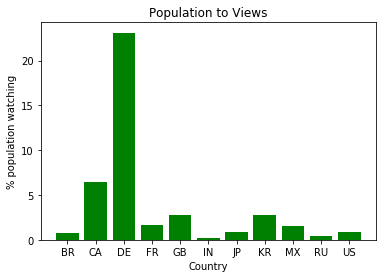

In [16]:
population_plot()

From the histogram, we see that Denmark, Canada, Great Britain, and Korea all have the highest watch precentage then any other country. This is partly due to there small population. Denmark has the smallest population on the list of countries we have looked at but has more people watching than anyone else. Even Canada, who has a decent size population dosen't have as loyal a following as Denmark.

<h2>Conclusion</h2>

<h2>youtube_kernel.py</h2>

All data that was run can also be run through the youtube_kernel script on ubuntu or command prompt. You can get all plots, datasets from there as well. You will need the following libraries to run:
<p>
    <ul>
        <li>numpy</li>
        <li>pandas</li>
        <li>requests</li>
        <li>os, glob</li>
        <li>matplotlib.pyplot</li>
        <li>itertools</li>
        <li>more_itertools</li>
        <li>google_trans_new</li>
        <li>argparse</li>
        <li>logging</li>
        </ul>
</p>
<p>
    Some warnings:, there is no write to csv or excel option. This is due to the fact that because of the size of the data, your computer will crash.